In [24]:
from keras.models import  Sequential
from keras import models, layers
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from keras.layers.core.activation import Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dataset = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [3]:
(X_train, y_train), (X_test, y_test) = dataset

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:

print(y_train.shape)
print(y_train)
#CONVERT Y INTO 1 DIMENSIONAL ARRAY

(50000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [6]:
# Train = 50000 images
# Test = 10000 images
# Image SIze = 32 * 32 pixel
# RGB pattern = 3

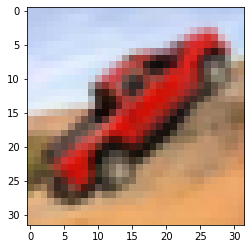

In [7]:
plt.imshow(X_train[140])

In [8]:
# CIFAR 10 = https://www.cs.toronto.edu/~kriz/cifar.html
# 10 CATEGORIES OF  IMAGE CATEGORIES LISTED

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
y_train = y_train.reshape(-1,)
print(y_train)
#CONVERT Y INTO 1 DIMENSIONAL ARRAY

[6 9 9 ... 9 1 1]


In [11]:
y_test = y_test.reshape(-1,)
print(y_test)
#CONVERT Y INTO 1 DIMENSIONAL ARRAY

[3 8 8 ... 5 1 7]


In [12]:
def plot_sample(X, y , index):
  plt.figure(figsize=(5,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

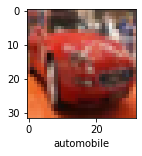

In [13]:
plot_sample(X_train,y_train, 5)

In [14]:
# #before data ormalization
# print(X_train)
# print(X_test)

In [15]:
# after normalization
X_train = X_train / 255
X_test = X_test / 255
# print(X_train)
# print(X_test)

In [16]:
# Trying with ANN for Model evaluation before jumping into Other Better DL techniques

In [17]:
modelANN = models.Sequential([
    layers.Flatten(input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])),
    layers.Dense(2000, activation='relu'),
    layers.Dense(3000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [18]:
# loss = sparse_categorical_crossentropy  since we didnot  OneHotEncode the 10 categories, we have them as 1-10 
modelANN.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [22]:
modelANN.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0933 - accuracy: 0.6183
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0668 - accuracy: 0.6290
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0390 - accuracy: 0.6400
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0187 - accuracy: 0.6454
Epoch 5/5
1563/1563 [==============================] - 5s 4ms/step - loss: 0.9908 - accuracy: 0.6556


In [23]:
modelANN.evaluate(X_test, y_test)
#MODEL  ACCURACY ON TEST DATA IS 45, VERY LOW WITH USING ANN

313/313 [==============================] - 1s 3ms/step - loss: 1.3999 - accuracy: 0.5135


[1.3999179601669312, 0.5134999752044678]

In [25]:
y_pred = modelANN.predict(X_test)

In [26]:
y_pred_Multiclass = [np.argmax(data) for data in y_pred]

In [34]:
# CONFUSION MATRIX FOR Y TEST AND Y PRED TEST DATA
confusion_matrix(y_test,y_pred_Multiclass)
#We can find that not all the data are on the diagonals, hence the accuracy is only 51% in case of ANN. 

array([[447,  32,  22,  15,  15,   5,  84, 122, 140, 118],
       [  7, 540,   2,  15,   2,  12,  43,  45,  49, 285],
       [ 45,  10, 219,  88,  75,  59, 257, 211,  11,  25],
       [ 13,   8,  23, 335,  19, 108, 253, 186,  11,  44],
       [ 22,   9,  35,  42, 293,  26, 291, 242,  26,  14],
       [  4,   1,  21, 221,  30, 307, 177, 199,  14,  26],
       [  2,   7,  10,  50,  21,  15, 832,  44,   5,  14],
       [  7,   3,   4,  33,  16,  33,  47, 815,   8,  34],
       [ 37,  42,  11,  36,   7,   6,  45,  55, 649, 112],
       [ 13,  73,   3,  18,   2,  10,  40, 113,  30, 698]])

In [29]:
#Classification Report for YTEST
print(classification_report(y_test, y_pred_Multiclass))

              precision    recall  f1-score   support

           0       0.75      0.45      0.56      1000
           1       0.74      0.54      0.63      1000
           2       0.63      0.22      0.32      1000
           3       0.39      0.34      0.36      1000
           4       0.61      0.29      0.40      1000
           5       0.53      0.31      0.39      1000
           6       0.40      0.83      0.54      1000
           7       0.40      0.81      0.54      1000
           8       0.69      0.65      0.67      1000
           9       0.51      0.70      0.59      1000

    accuracy                           0.51     10000
   macro avg       0.57      0.51      0.50     10000
weighted avg       0.57      0.51      0.50     10000



In [30]:
y_predTrain = modelANN.predict(X_train)

In [31]:
y_pred_MulticlassTrain = [np.argmax(data) for data in y_predTrain]

In [35]:
# CONFUSION MATRIX FOR Y TRAIN AND Y PRED TRAIN DATA
confusion_matrix(y_train,y_pred_MulticlassTrain)
#We can find that not all the data are on the diagonals, hence the accuracy is only 66% in case of ANN. 

array([[2530,  151,   85,  104,   67,   28,  359,  654,  546,  476],
       [  24, 3429,    3,   47,   11,   10,  122,  150,  145, 1059],
       [ 188,   39, 1379,  327,  361,  224, 1332,  964,   63,  123],
       [  35,   25,   70, 2469,   60,  301, 1140,  724,   58,  118],
       [  66,   20,  129,  209, 1931,   81, 1231, 1169,   79,   85],
       [  14,   13,   85,  811,   76, 2225,  788,  884,   27,   77],
       [   5,   21,   23,  112,   54,   30, 4557,  156,   10,   32],
       [  12,   11,   21,   86,   62,   60,  165, 4504,   19,   60],
       [ 156,  113,   27,   99,   38,   19,  202,  160, 3750,  436],
       [  23,  131,    7,   48,    8,   27,  148,  338,   79, 4191]])

In [36]:
#Classification Report for YTRAIN
print(classification_report(y_train, y_pred_MulticlassTrain))

              precision    recall  f1-score   support

           0       0.83      0.51      0.63      5000
           1       0.87      0.69      0.77      5000
           2       0.75      0.28      0.40      5000
           3       0.57      0.49      0.53      5000
           4       0.72      0.39      0.50      5000
           5       0.74      0.45      0.56      5000
           6       0.45      0.91      0.61      5000
           7       0.46      0.90      0.61      5000
           8       0.79      0.75      0.77      5000
           9       0.63      0.84      0.72      5000

    accuracy                           0.62     50000
   macro avg       0.68      0.62      0.61     50000
weighted avg       0.68      0.62      0.61     50000



In [37]:
modelANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2000)              6146000   
                                                                 
 dense_1 (Dense)             (None, 3000)              6003000   
                                                                 
 dense_2 (Dense)             (None, 10)                30010     
                                                                 
Total params: 12,179,010
Trainable params: 12,179,010
Non-trainable params: 0
_________________________________________________________________
